# 🎮 Mobile Game Analytics: Player Retention & Monetization Analysis

## Project Overview

This project analyzes player behavior data from a mobile puzzle game to understand:

1. **Player Retention** - Day 1, Day 7, Day 30 retention rates and drivers
2. **A/B Testing** - Impact of different onboarding experiences on retention
3. **Cohort Analysis** - How different player cohorts behave over time
4. **Monetization** - Payer conversion, ARPU, ARPPU analysis
5. **Churn Prediction** - Building a model to predict player churn

### Business Context

Mobile game companies rely heavily on retention and monetization metrics to:
- Optimize user acquisition spending (CAC vs LTV)
- Improve game design through A/B testing
- Identify high-value player segments
- Reduce churn through targeted interventions

---

**Author:** Burak  
**Date:** January 2025  
**Tools:** Python, Pandas, Seaborn, Scikit-learn

## 1. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Load data
players = pd.read_csv('../data/raw/players.csv', parse_dates=['install_date'])
events = pd.read_csv('../data/raw/events.csv', parse_dates=['event_timestamp'])

print(f"📊 Players Dataset: {players.shape[0]:,} rows, {players.shape[1]} columns")
print(f"📊 Events Dataset: {events.shape[0]:,} rows, {events.shape[1]} columns")

📊 Players Dataset: 50,000 rows, 32 columns
📊 Events Dataset: 171,194 rows, 4 columns


In [3]:
# First look at the data
players.head()

,user_id,install_date,country,platform,age_group,ab_group,acquisition_channel,device_model,total_sessions_30d,avg_session_duration_mins,total_playtime_hours_30d,levels_completed,max_level_reached,games_played,tutorial_completed,friends_added,gifts_sent,gifts_received,retention_day1,retention_day7,retention_day30,days_since_last_active,is_churned,is_payer,num_purchases,total_revenue_usd,avg_purchase_value,first_purchase_day,first_iap_category,ad_views_30d,ad_revenue_usd,estimated_ltv_usd
0,user_000000,2024-12-21,Japan,Android,13-17,variant_B,Facebook Ads,Redmi Note 13,1,8.90,0.15,32,34,85,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,-1,NaN,7,0.25,0.25
1,user_000001,2024-10-15,Japan,Android,25-34,variant_A,Google Ads,Google Pixel 8,32,5.40,2.88,0,4,0,1,1,3,3,0,0,0,1,0,0,0,0.00,0.00,-1,NaN,249,12.17,12.17
2,user_000002,2024-10-04,Turkey,Android,35-44,control,Organic,Samsung Galaxy S24,17,9.00,2.55,0,1,0,1,5,1,2,0,0,0,0,0,0,0,0.00,0.00,-1,NaN,85,1.27,1.27
3,user_000003,2024-11-05,Brazil,Android,35-44,variant_B,Facebook Ads,Samsung Galaxy Tab S9,12,8.30,1.66,23,26,53,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,-1,NaN,83,2.69,2.69
4,user_000004,2024-11-01,Turkey,iOS,35-44,variant_A,Organic,iPhone SE,200,17.10,57.00,4,7,8,1,2,4,3,1,0,0,41,1,0,0,0.00,0.00,-1,NaN,1243,43.45,43.45


In [4]:
# Data types and info
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    50000 non-null  object        
 1   install_date               50000 non-null  datetime64[ns]
 2   country                    50000 non-null  object        
 3   platform                   50000 non-null  object        
 4   age_group                  50000 non-null  object        
 5   ab_group                   50000 non-null  object        
 6   acquisition_channel        50000 non-null  object        
 7   device_model               50000 non-null  object        
 8   total_sessions_30d         50000 non-null  int64         
 9   avg_session_duration_mins  50000 non-null  float64       
 10  total_playtime_hours_30d   50000 non-null  float64       
 11  levels_completed           50000 non-null  int64         
 12  max_

In [5]:
# Statistical summary
players.describe()

,install_date,total_sessions_30d,avg_session_duration_mins,total_playtime_hours_30d,levels_completed,max_level_reached,games_played,tutorial_completed,friends_added,gifts_sent,gifts_received,retention_day1,retention_day7,retention_day30,days_since_last_active,is_churned,is_payer,num_purchases,total_revenue_usd,avg_purchase_value,first_purchase_day,ad_views_30d,ad_revenue_usd,estimated_ltv_usd
count,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,2024-11-15 01:46:49.152000256,24.09,12.53,5.14,15.23,17.23,33.73,0.77,1.54,2.00,1.65,0.40,0.14,0.04,13.49,0.28,0.04,0.13,0.86,0.26,-0.79,126.05,3.77,4.63
min,2024-10-01 00:00:00,1.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.03
25%,2024-10-23 00:00:00,5.00,7.00,0.77,4.00,6.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,24.00,0.62,0.69
50%,2024-11-15 00:00:00,12.00,10.95,2.08,10.00,12.00,22.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,60.00,1.65,1.81
75%,2024-12-08 00:00:00,28.00,16.40,5.46,21.00,23.00,46.00,1.00,2.00,3.00,3.00,1.00,0.00,0.00,18.00,1.00,0.00,0.00,0.00,0.00,-1.00,144.00,4.14,4.68
max,2024-12-30 00:00:00,200.00,67.20,163.67,188.00,189.00,493.00,1.00,10.00,13.00,11.00,1.00,1.00,1.00,89.00,1.00,1.00,25.00,228.90,99.99,36.00,1599.00,77.65,229.61
std,NaN,33.77,7.60,9.15,16.13,16.20,37.37,0.42,1.50,2.00,1.75,0.49,0.35,0.21,22.92,0.45,0.19,0.84,7.06,2.12,1.45,188.34,6.17,9.15


## 2. Exploratory Data Analysis (EDA)

### 2.1 Player Demographics

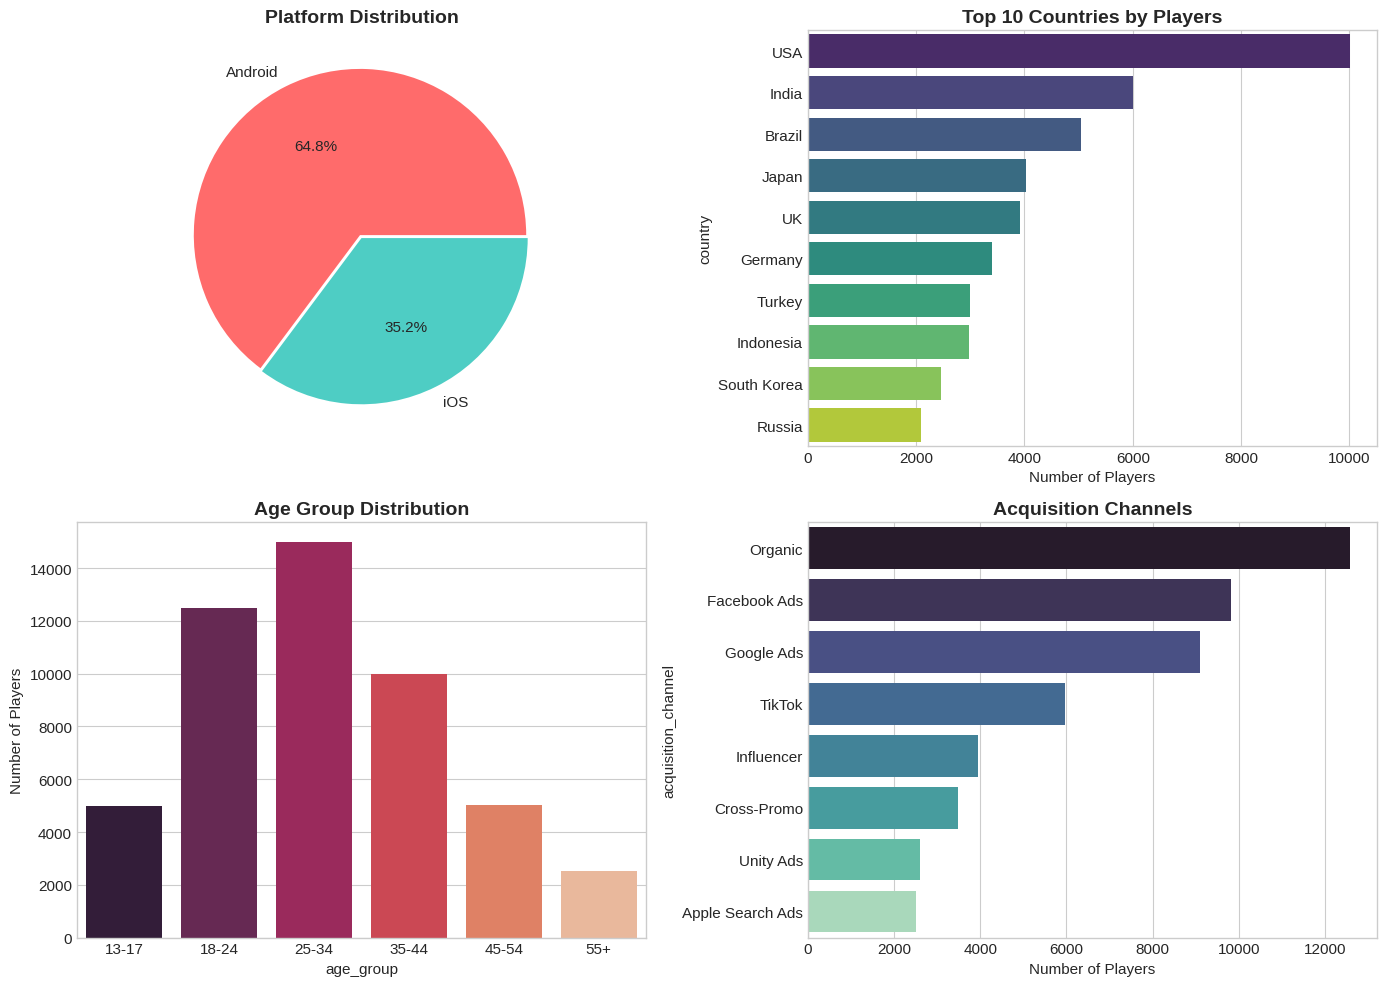

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Platform distribution
platform_counts = players['platform'].value_counts()
axes[0, 0].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', 
               colors=['#FF6B6B', '#4ECDC4'], explode=(0.02, 0))
axes[0, 0].set_title('Platform Distribution', fontsize=14, fontweight='bold')

# Country distribution (Top 10)
country_counts = players['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Top 10 Countries by Players', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Players')

# Age group distribution
age_order = ['13-17', '18-24', '25-34', '35-44', '45-54', '55+']
age_counts = players['age_group'].value_counts().reindex(age_order)
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[1, 0], palette='rocket')
axes[1, 0].set_title('Age Group Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Number of Players')

# Acquisition channel
channel_counts = players['acquisition_channel'].value_counts()
sns.barplot(x=channel_counts.values, y=channel_counts.index, ax=axes[1, 1], palette='mako')
axes[1, 1].set_title('Acquisition Channels', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Players')

plt.tight_layout()
plt.savefig('../reports/01_player_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

### 2.2 Engagement Metrics Distribution

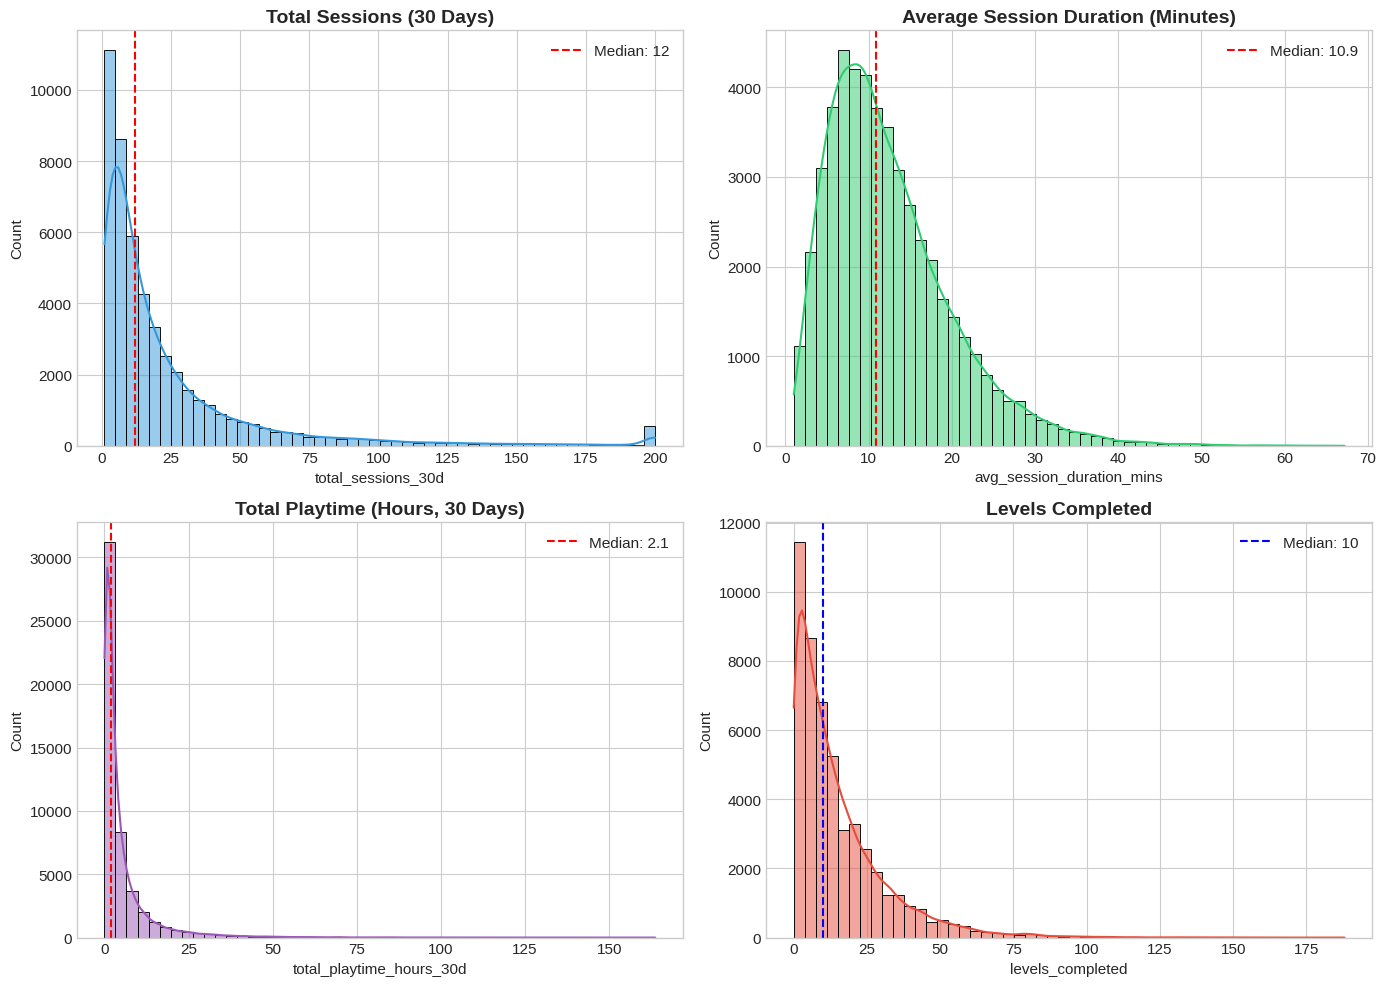

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sessions distribution
sns.histplot(players['total_sessions_30d'], bins=50, ax=axes[0, 0], color='#3498db', kde=True)
axes[0, 0].set_title('Total Sessions (30 Days)', fontsize=14, fontweight='bold')
axes[0, 0].axvline(players['total_sessions_30d'].median(), color='red', linestyle='--', label=f"Median: {players['total_sessions_30d'].median():.0f}")
axes[0, 0].legend()

# Session duration
sns.histplot(players['avg_session_duration_mins'], bins=50, ax=axes[0, 1], color='#2ecc71', kde=True)
axes[0, 1].set_title('Average Session Duration (Minutes)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(players['avg_session_duration_mins'].median(), color='red', linestyle='--', label=f"Median: {players['avg_session_duration_mins'].median():.1f}")
axes[0, 1].legend()

# Playtime distribution
sns.histplot(players['total_playtime_hours_30d'], bins=50, ax=axes[1, 0], color='#9b59b6', kde=True)
axes[1, 0].set_title('Total Playtime (Hours, 30 Days)', fontsize=14, fontweight='bold')
axes[1, 0].axvline(players['total_playtime_hours_30d'].median(), color='red', linestyle='--', label=f"Median: {players['total_playtime_hours_30d'].median():.1f}")
axes[1, 0].legend()

# Levels completed
sns.histplot(players['levels_completed'], bins=50, ax=axes[1, 1], color='#e74c3c', kde=True)
axes[1, 1].set_title('Levels Completed', fontsize=14, fontweight='bold')
axes[1, 1].axvline(players['levels_completed'].median(), color='blue', linestyle='--', label=f"Median: {players['levels_completed'].median():.0f}")
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../reports/02_engagement_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Retention Analysis

### 3.1 Overall Retention Rates

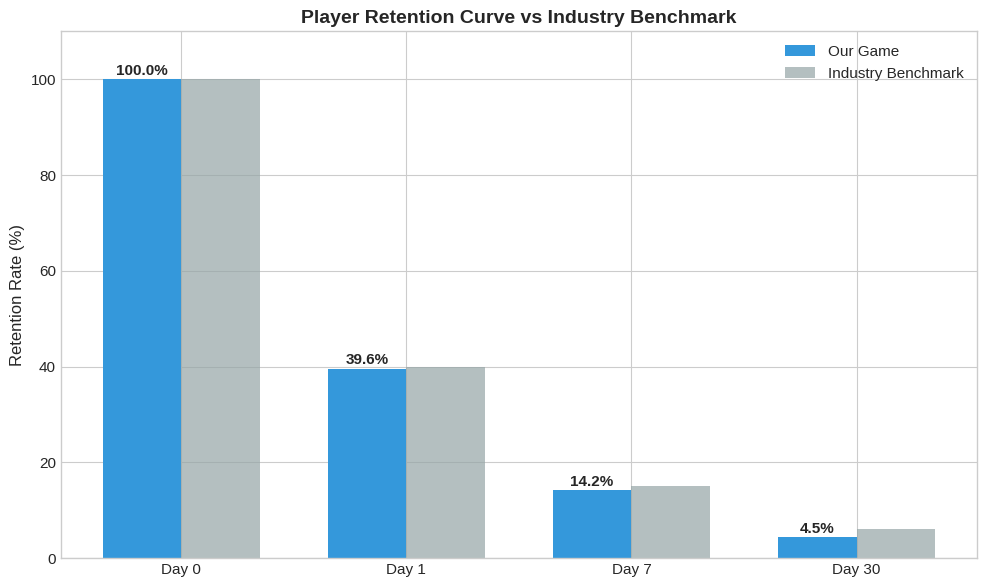


📊 Retention Summary:
   Day 0: 100.0% (Benchmark: 100%, Diff: +0.0%) ✅
   Day 1: 39.6% (Benchmark: 40%, Diff: -0.4%) ⚠️
   Day 7: 14.2% (Benchmark: 15%, Diff: -0.8%) ⚠️
   Day 30: 4.5% (Benchmark: 6%, Diff: -1.5%) ⚠️


In [8]:
# Calculate retention rates
retention_rates = {
    'Day 0': 100,
    'Day 1': players['retention_day1'].mean() * 100,
    'Day 7': players['retention_day7'].mean() * 100,
    'Day 30': players['retention_day30'].mean() * 100
}

# Industry benchmarks for casual games
benchmarks = {
    'Day 0': 100,
    'Day 1': 40,
    'Day 7': 15,
    'Day 30': 6
}

fig, ax = plt.subplots(figsize=(10, 6))

x = list(retention_rates.keys())
y_actual = list(retention_rates.values())
y_benchmark = list(benchmarks.values())

width = 0.35
x_pos = np.arange(len(x))

bars1 = ax.bar(x_pos - width/2, y_actual, width, label='Our Game', color='#3498db')
bars2 = ax.bar(x_pos + width/2, y_benchmark, width, label='Industry Benchmark', color='#95a5a6', alpha=0.7)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontweight='bold')

ax.set_ylabel('Retention Rate (%)', fontsize=12)
ax.set_title('Player Retention Curve vs Industry Benchmark', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylim(0, 110)

plt.tight_layout()
plt.savefig('../reports/03_retention_curve.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Retention Summary:")
for day, rate in retention_rates.items():
    benchmark = benchmarks[day]
    diff = rate - benchmark
    emoji = "✅" if diff >= 0 else "⚠️"
    print(f"   {day}: {rate:.1f}% (Benchmark: {benchmark}%, Diff: {diff:+.1f}%) {emoji}")

### 3.2 Retention by Acquisition Channel

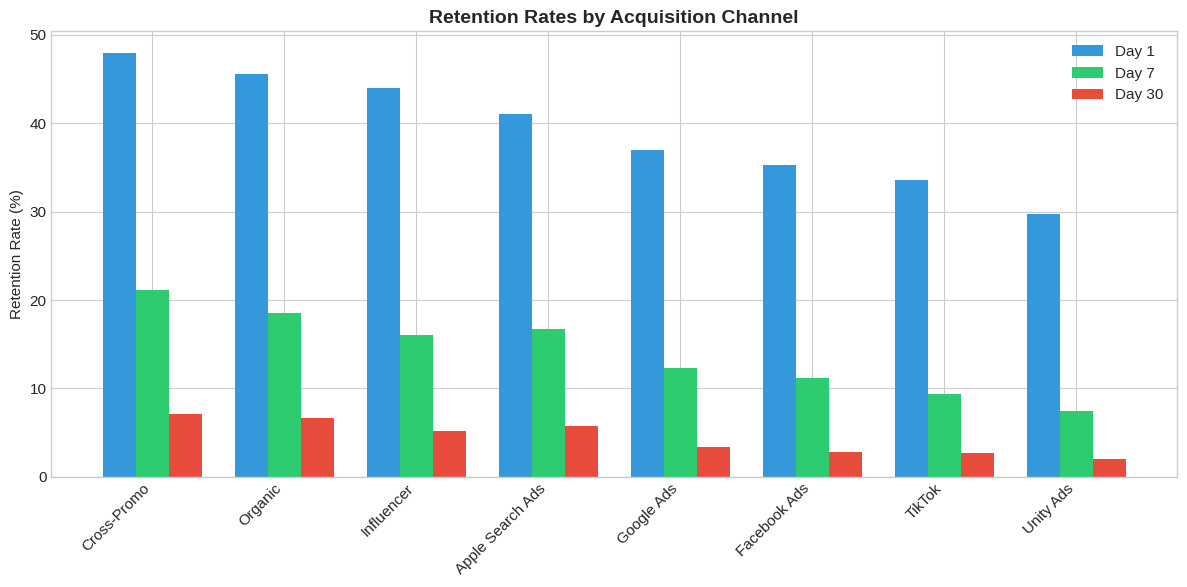


📊 Retention by Acquisition Channel:
                     total_users  retention_day1  retention_day7  retention_day30
acquisition_channel                                                              
Cross-Promo                 3481           48.00           21.14             7.12
Organic                    12575           45.63           18.52             6.62
Influencer                  3948           44.00           16.01             5.19
Apple Search Ads            2503           41.07           16.70             5.79
Google Ads                  9105           36.97           12.26             3.40
Facebook Ads                9823           35.28           11.15             2.82
TikTok                      5972           33.61            9.36             2.66
Unity Ads                   2593           29.73            7.48             2.04


In [9]:
# Retention by channel
retention_by_channel = players.groupby('acquisition_channel').agg({
    'user_id': 'count',
    'retention_day1': 'mean',
    'retention_day7': 'mean',
    'retention_day30': 'mean'
}).rename(columns={'user_id': 'total_users'})

retention_by_channel[['retention_day1', 'retention_day7', 'retention_day30']] *= 100
retention_by_channel = retention_by_channel.sort_values('retention_day1', ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(retention_by_channel))
width = 0.25

bars1 = ax.bar(x - width, retention_by_channel['retention_day1'], width, label='Day 1', color='#3498db')
bars2 = ax.bar(x, retention_by_channel['retention_day7'], width, label='Day 7', color='#2ecc71')
bars3 = ax.bar(x + width, retention_by_channel['retention_day30'], width, label='Day 30', color='#e74c3c')

ax.set_ylabel('Retention Rate (%)')
ax.set_title('Retention Rates by Acquisition Channel', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(retention_by_channel.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/04_retention_by_channel.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Retention by Acquisition Channel:")
print(retention_by_channel.round(2).to_string())

### 3.3 Retention by Platform

📊 Retention & ARPU by Platform:
          total_users  retention_day1  retention_day7  retention_day30  arpu
platform                                                                    
Android         32392           39.44           14.09             4.41  0.82
iOS             17608           39.79           14.28             4.55  0.93


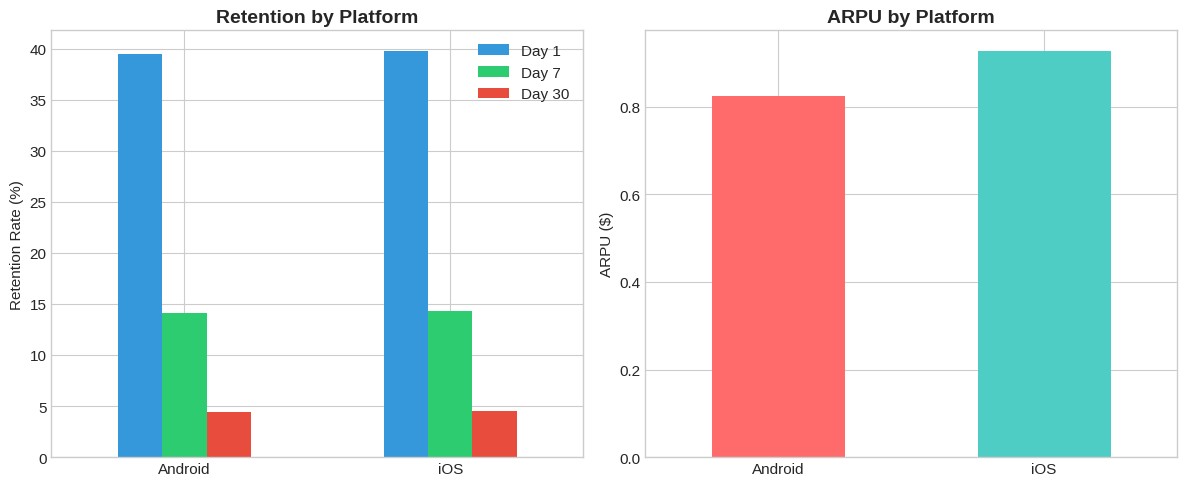

In [10]:
# Retention by platform
retention_by_platform = players.groupby('platform').agg({
    'user_id': 'count',
    'retention_day1': 'mean',
    'retention_day7': 'mean',
    'retention_day30': 'mean',
    'total_revenue_usd': 'mean'
}).rename(columns={'user_id': 'total_users', 'total_revenue_usd': 'arpu'})

retention_by_platform[['retention_day1', 'retention_day7', 'retention_day30']] *= 100

print("📊 Retention & ARPU by Platform:")
print(retention_by_platform.round(2).to_string())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Retention comparison
retention_by_platform[['retention_day1', 'retention_day7', 'retention_day30']].plot(
    kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Retention by Platform', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Retention Rate (%)')
axes[0].set_xlabel('')
axes[0].legend(['Day 1', 'Day 7', 'Day 30'])
axes[0].tick_params(axis='x', rotation=0)

# ARPU comparison
retention_by_platform['arpu'].plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('ARPU by Platform', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ARPU ($)')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../reports/05_retention_by_platform.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. A/B Testing Analysis

We ran an A/B test with 3 variants:
- **Control**: Original onboarding flow
- **Variant A**: Improved onboarding with better tutorial
- **Variant B**: Simplified onboarding (fewer steps)

In [11]:
# A/B Test Summary
ab_summary = players.groupby('ab_group').agg({
    'user_id': 'count',
    'retention_day1': 'mean',
    'retention_day7': 'mean',
    'retention_day30': 'mean',
    'tutorial_completed': 'mean',
    'total_sessions_30d': 'mean',
    'is_payer': 'mean',
    'total_revenue_usd': 'mean'
}).rename(columns={
    'user_id': 'users',
    'tutorial_completed': 'tutorial_rate',
    'is_payer': 'payer_rate',
    'total_revenue_usd': 'arpu'
})

# Convert to percentages
ab_summary[['retention_day1', 'retention_day7', 'retention_day30', 'tutorial_rate', 'payer_rate']] *= 100

print("🧪 A/B Test Results Summary:")
print(ab_summary.round(2).to_string())

🧪 A/B Test Results Summary:
           users  retention_day1  retention_day7  retention_day30  tutorial_rate  total_sessions_30d  payer_rate  arpu
ab_group                                                                                                              
control    17044           38.64           13.11             3.76          69.94               23.46        3.53  0.75
variant_A  16437           44.83           17.98             6.48          90.42               26.50        4.20  0.97
variant_B  16519           35.30           11.43             3.17          69.99               22.35        3.69  0.86


In [12]:
# Statistical significance test (Chi-square for retention)
from scipy.stats import chi2_contingency, mannwhitneyu

# Day 1 Retention Chi-square test
contingency_table = pd.crosstab(players['ab_group'], players['retention_day1'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n📊 Statistical Significance Test (Day 1 Retention):")
print(f"   Chi-square statistic: {chi2:.2f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Degrees of freedom: {dof}")

if p_value < 0.05:
    print("   ✅ Result is STATISTICALLY SIGNIFICANT (p < 0.05)")
else:
    print("   ⚠️ Result is NOT statistically significant (p >= 0.05)")


📊 Statistical Significance Test (Day 1 Retention):
   Chi-square statistic: 322.14
   P-value: 0.000000
   Degrees of freedom: 2
   ✅ Result is STATISTICALLY SIGNIFICANT (p < 0.05)


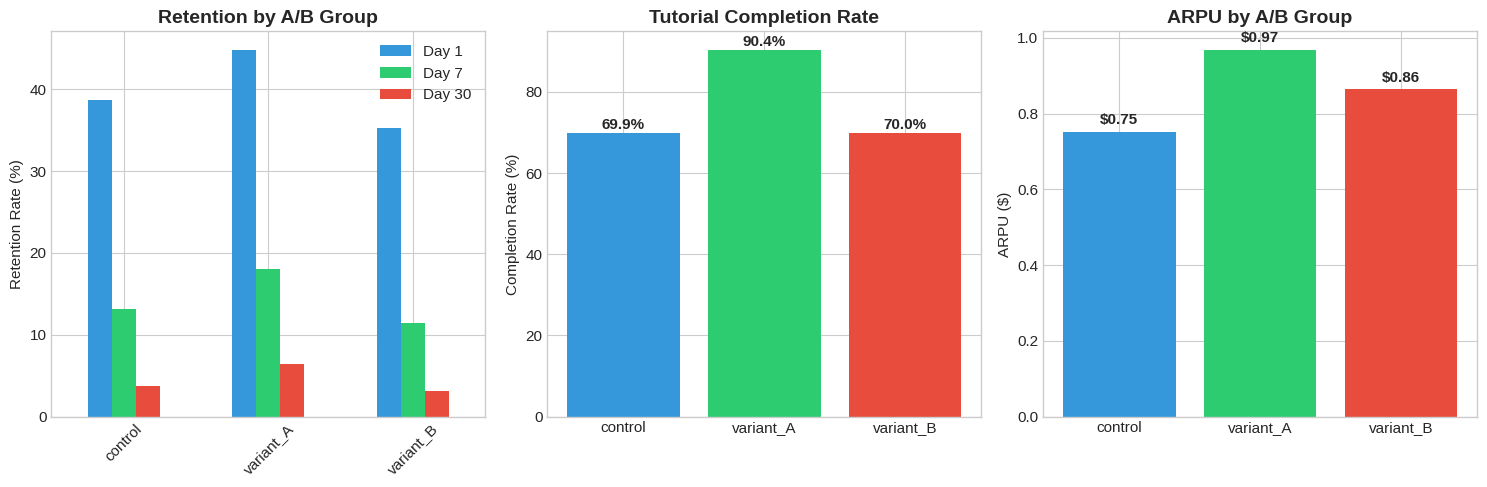


📈 Day 1 Retention Lift vs Control:
   Variant A: +16.0%
   Variant B: -8.6%


In [13]:
# A/B Test Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

groups = ['control', 'variant_A', 'variant_B']
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Retention comparison
retention_data = ab_summary[['retention_day1', 'retention_day7', 'retention_day30']]
retention_data.plot(kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Retention by A/B Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Retention Rate (%)')
axes[0].set_xlabel('')
axes[0].legend(['Day 1', 'Day 7', 'Day 30'])
axes[0].tick_params(axis='x', rotation=45)

# Tutorial completion
ax2 = axes[1]
bars = ax2.bar(groups, ab_summary['tutorial_rate'], color=colors)
ax2.set_title('Tutorial Completion Rate', fontsize=14, fontweight='bold')
ax2.set_ylabel('Completion Rate (%)')
for bar, val in zip(bars, ab_summary['tutorial_rate']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.1f}%', 
             ha='center', fontweight='bold')

# ARPU
ax3 = axes[2]
bars = ax3.bar(groups, ab_summary['arpu'], color=colors)
ax3.set_title('ARPU by A/B Group', fontsize=14, fontweight='bold')
ax3.set_ylabel('ARPU ($)')
for bar, val in zip(bars, ab_summary['arpu']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'${val:.2f}', 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/06_ab_test_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate lift
control_d1 = ab_summary.loc['control', 'retention_day1']
variant_a_d1 = ab_summary.loc['variant_A', 'retention_day1']
variant_b_d1 = ab_summary.loc['variant_B', 'retention_day1']

print("\n📈 Day 1 Retention Lift vs Control:")
print(f"   Variant A: {((variant_a_d1 - control_d1) / control_d1) * 100:+.1f}%")
print(f"   Variant B: {((variant_b_d1 - control_d1) / control_d1) * 100:+.1f}%")

### 4.1 A/B Test Bootstrap Analysis

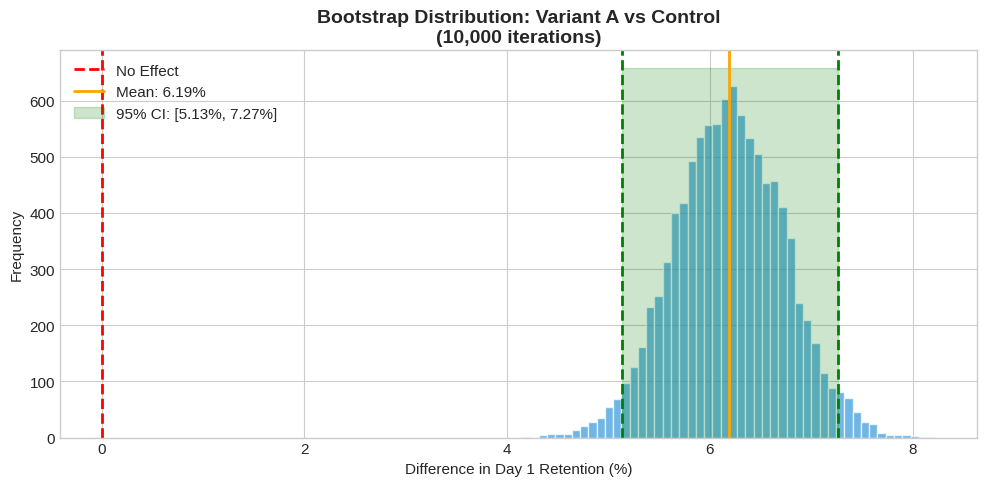


📊 Bootstrap Analysis Results:
   Mean Difference: 6.19%
   95% CI: [5.13%, 7.27%]
   Probability Variant A > Control: 100.0%


In [14]:
def bootstrap_mean_diff(group1, group2, n_bootstrap=10000):
    """Calculate bootstrap confidence interval for difference in means"""
    diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diffs.append(sample2.mean() - sample1.mean())
    return np.array(diffs)

# Bootstrap for Variant A vs Control
control_retention = players[players['ab_group'] == 'control']['retention_day1'].values
variant_a_retention = players[players['ab_group'] == 'variant_A']['retention_day1'].values

boot_diffs = bootstrap_mean_diff(control_retention, variant_a_retention)

# Confidence interval
ci_low = np.percentile(boot_diffs, 2.5) * 100
ci_high = np.percentile(boot_diffs, 97.5) * 100
mean_diff = boot_diffs.mean() * 100

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(boot_diffs * 100, bins=50, color='#3498db', alpha=0.7, edgecolor='white')
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='No Effect')
ax.axvline(ci_low, color='green', linestyle='--', linewidth=2)
ax.axvline(ci_high, color='green', linestyle='--', linewidth=2)
ax.axvline(mean_diff, color='orange', linewidth=2, label=f'Mean: {mean_diff:.2f}%')

ax.fill_betweenx([0, ax.get_ylim()[1]], ci_low, ci_high, alpha=0.2, color='green', 
                  label=f'95% CI: [{ci_low:.2f}%, {ci_high:.2f}%]')

ax.set_xlabel('Difference in Day 1 Retention (%)')
ax.set_ylabel('Frequency')
ax.set_title('Bootstrap Distribution: Variant A vs Control\n(10,000 iterations)', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/07_bootstrap_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Probability that Variant A is better
prob_better = (boot_diffs > 0).mean() * 100
print(f"\n📊 Bootstrap Analysis Results:")
print(f"   Mean Difference: {mean_diff:.2f}%")
print(f"   95% CI: [{ci_low:.2f}%, {ci_high:.2f}%]")
print(f"   Probability Variant A > Control: {prob_better:.1f}%")

## 5. Cohort Analysis

In [15]:
# Create cohorts by install week
players['cohort_week'] = players['install_date'].dt.to_period('W').dt.start_time
players['cohort_name'] = players['cohort_week'].dt.strftime('W%V-%Y')

# Cohort retention heatmap
cohort_retention = players.groupby('cohort_week').agg({
    'user_id': 'count',
    'retention_day1': 'mean',
    'retention_day7': 'mean',
    'retention_day30': 'mean'
}).rename(columns={'user_id': 'cohort_size'})

cohort_retention[['retention_day1', 'retention_day7', 'retention_day30']] *= 100

# Keep only recent cohorts (last 12 weeks)
cohort_retention = cohort_retention.tail(12)

print("📊 Cohort Retention Analysis:")
print(cohort_retention.round(2).to_string())

📊 Cohort Retention Analysis:
             cohort_size  retention_day1  retention_day7  retention_day30
cohort_week                                                              
2024-10-14          3929           39.20           14.10             4.33
2024-10-21          3803           41.20           14.28             4.84
2024-10-28          3786           39.01           13.52             4.28
2024-11-04          3806           38.52           14.06             4.23
2024-11-11          3781           38.32           13.81             4.97
2024-11-18          3971           39.61           13.52             3.83
2024-11-25          3860           40.05           14.20             4.02
2024-12-02          3739           39.77           13.53             4.28
2024-12-09          3887           39.44           14.20             4.66
2024-12-16          3838           39.53           14.43             4.72
2024-12-23          3935           38.96           14.43             4.63
2024-12-3

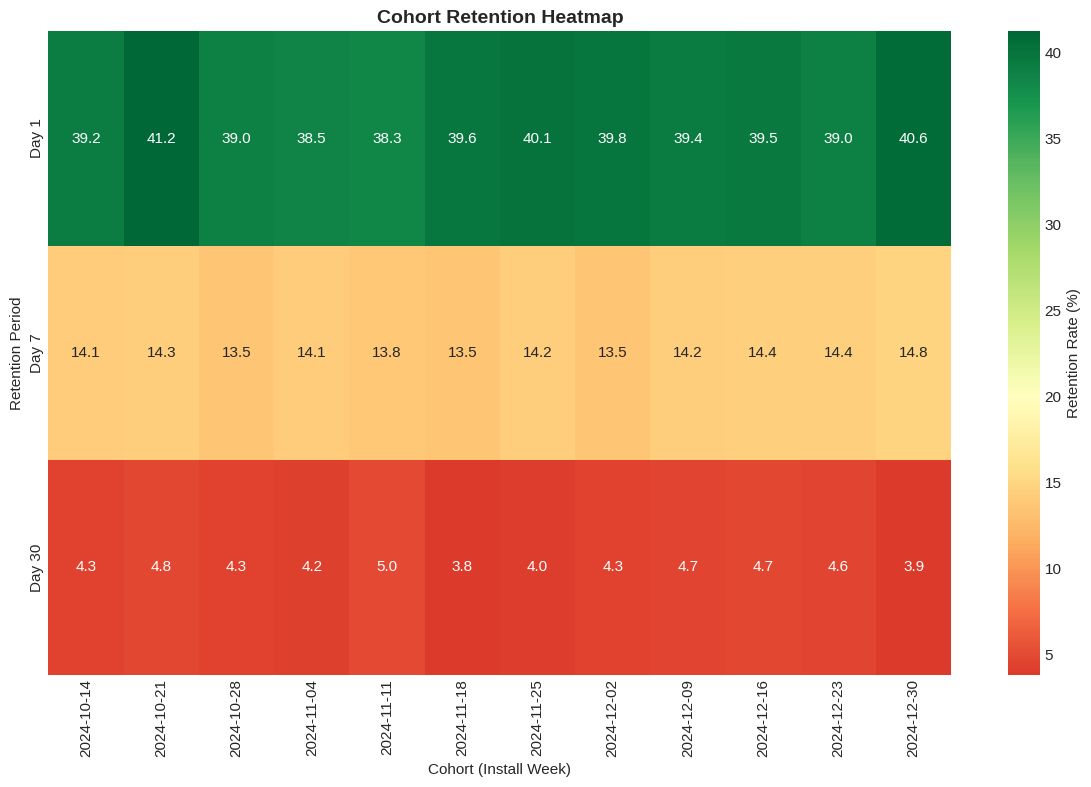

In [16]:
# Cohort Heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = cohort_retention[['retention_day1', 'retention_day7', 'retention_day30']].T
heatmap_data.index = ['Day 1', 'Day 7', 'Day 30']
heatmap_data.columns = [d.strftime('%Y-%m-%d') for d in heatmap_data.columns]

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=20, ax=ax, cbar_kws={'label': 'Retention Rate (%)'})

ax.set_title('Cohort Retention Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Cohort (Install Week)')
ax.set_ylabel('Retention Period')

plt.tight_layout()
plt.savefig('../reports/08_cohort_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Monetization Analysis

In [17]:
# Monetization KPIs
total_players = len(players)
total_payers = players['is_payer'].sum()
total_revenue = players['total_revenue_usd'].sum()

payer_conversion = (total_payers / total_players) * 100
arpu = total_revenue / total_players
arppu = total_revenue / total_payers if total_payers > 0 else 0

print("💰 Monetization KPIs:")
print(f"   Total Players: {total_players:,}")
print(f"   Total Payers: {total_payers:,}")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"\n   Payer Conversion: {payer_conversion:.2f}%")
print(f"   ARPU: ${arpu:.2f}")
print(f"   ARPPU: ${arppu:.2f}")

💰 Monetization KPIs:
   Total Players: 50,000
   Total Payers: 1,901
   Total Revenue: $43,038.32

   Payer Conversion: 3.80%
   ARPU: $0.86
   ARPPU: $22.64


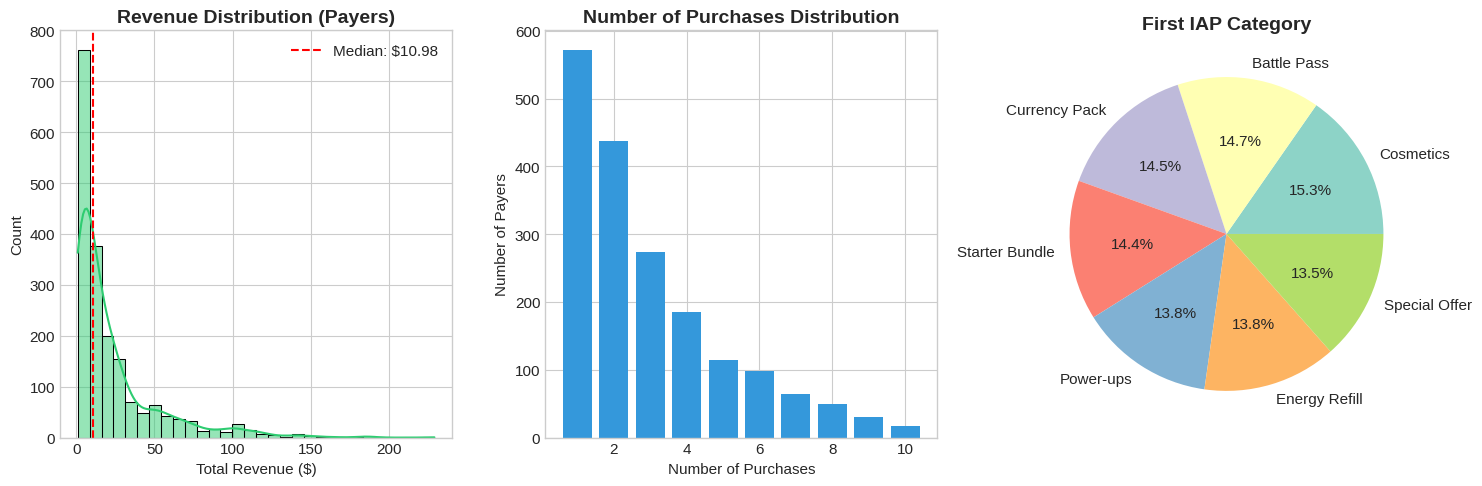

In [18]:
# Revenue distribution (payers only)
payers = players[players['is_payer'] == 1].copy()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Revenue distribution
sns.histplot(payers['total_revenue_usd'], bins=30, ax=axes[0], color='#2ecc71', kde=True)
axes[0].set_title('Revenue Distribution (Payers)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Revenue ($)')
axes[0].axvline(payers['total_revenue_usd'].median(), color='red', linestyle='--', 
                label=f"Median: ${payers['total_revenue_usd'].median():.2f}")
axes[0].legend()

# Number of purchases
purchase_counts = payers['num_purchases'].value_counts().sort_index().head(10)
axes[1].bar(purchase_counts.index, purchase_counts.values, color='#3498db')
axes[1].set_title('Number of Purchases Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Payers')

# First IAP category
iap_category = payers['first_iap_category'].value_counts()
axes[2].pie(iap_category, labels=iap_category.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
axes[2].set_title('First IAP Category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/09_monetization_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

📊 Revenue by Country:
             total_users  payers  total_revenue_usd  payer_rate  arpu
country                                                              
USA                10008     372            8637.82        3.72  0.86
India               6002     229            4881.79        3.82  0.81
Brazil              5051     181            3645.37        3.58  0.72
UK                  3912     135            3474.20        3.45  0.89
Japan               4031     135            3366.63        3.35  0.84
South Korea         2461      99            2981.31        4.02  1.21
Germany             3401     147            2905.40        4.32  0.85
Turkey              2998     134            2844.41        4.47  0.95
Indonesia           2976     130            2583.93        4.37  0.87
Mexico              2049      80            1991.92        3.90  0.97


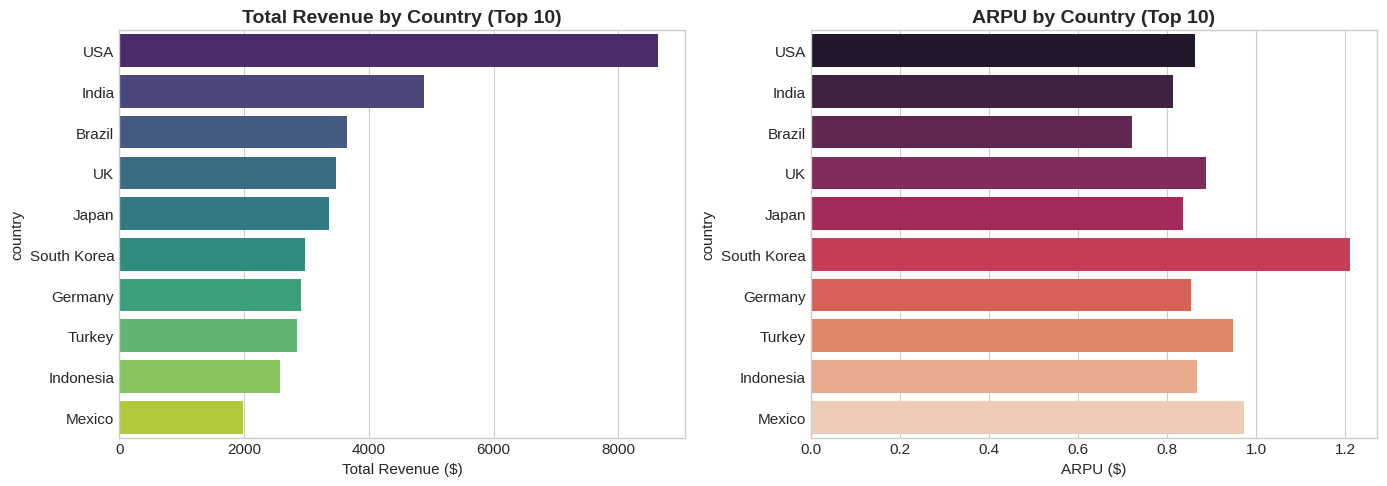

In [19]:
# Revenue by country
revenue_by_country = players.groupby('country').agg({
    'user_id': 'count',
    'is_payer': 'sum',
    'total_revenue_usd': 'sum'
}).rename(columns={'user_id': 'total_users', 'is_payer': 'payers'})

revenue_by_country['payer_rate'] = (revenue_by_country['payers'] / revenue_by_country['total_users']) * 100
revenue_by_country['arpu'] = revenue_by_country['total_revenue_usd'] / revenue_by_country['total_users']
revenue_by_country = revenue_by_country.sort_values('total_revenue_usd', ascending=False)

print("📊 Revenue by Country:")
print(revenue_by_country.round(2).head(10).to_string())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top_countries = revenue_by_country.head(10)

# Total revenue
sns.barplot(x=top_countries['total_revenue_usd'], y=top_countries.index, ax=axes[0], palette='viridis')
axes[0].set_title('Total Revenue by Country (Top 10)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Revenue ($)')

# ARPU
sns.barplot(x=top_countries['arpu'], y=top_countries.index, ax=axes[1], palette='rocket')
axes[1].set_title('ARPU by Country (Top 10)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ARPU ($)')

plt.tight_layout()
plt.savefig('../reports/10_revenue_by_country.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Churn Prediction Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle

# Prepare features for churn prediction
churn_df = players.copy()

# Encode categorical variables
le_platform = LabelEncoder()
le_channel = LabelEncoder()
le_country = LabelEncoder()
le_age = LabelEncoder()
le_ab = LabelEncoder()

churn_df['platform_encoded'] = le_platform.fit_transform(churn_df['platform'])
churn_df['channel_encoded'] = le_channel.fit_transform(churn_df['acquisition_channel'])
churn_df['country_encoded'] = le_country.fit_transform(churn_df['country'])
churn_df['age_encoded'] = le_age.fit_transform(churn_df['age_group'])
churn_df['ab_encoded'] = le_ab.fit_transform(churn_df['ab_group'])

# Features
feature_cols = [
    'total_sessions_30d', 'avg_session_duration_mins', 'total_playtime_hours_30d',
    'levels_completed', 'games_played', 'tutorial_completed',
    'friends_added', 'gifts_sent', 'gifts_received',
    'platform_encoded', 'channel_encoded', 'country_encoded', 'age_encoded', 'ab_encoded',
    'retention_day1', 'retention_day7'
]

X = churn_df[feature_cols]
y = churn_df['is_churned']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Training set: {len(X_train):,} samples")
print(f"📊 Test set: {len(X_test):,} samples")
print(f"📊 Churn rate in training: {y_train.mean()*100:.1f}%")
print(f"📊 Churn rate in test: {y_test.mean()*100:.1f}%")

📊 Training set: 40,000 samples
📊 Test set: 10,000 samples
📊 Churn rate in training: 27.7%
📊 Churn rate in test: 27.7%


In [21]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Random Forest Model Performance:")
print("\n" + classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

📊 Random Forest Model Performance:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7230
           1       0.80      0.82      0.81      2770

    accuracy                           0.89     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.89      0.89      0.89     10000


ROC-AUC Score: 0.9549


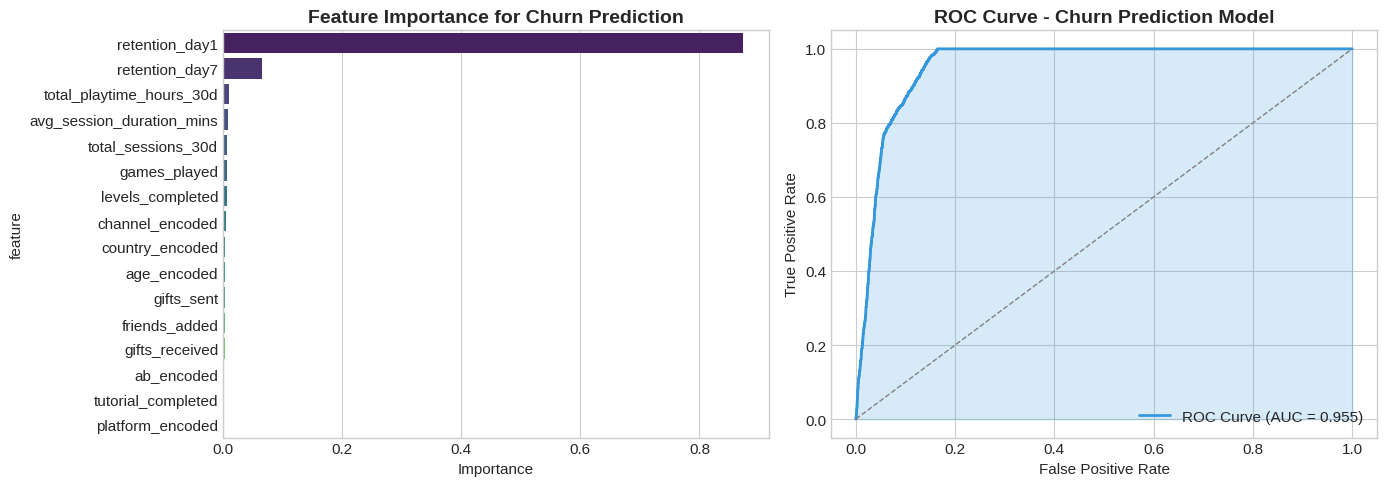


📊 Top 5 Features for Churn Prediction:
                  feature  importance
           retention_day1        0.87
           retention_day7        0.07
 total_playtime_hours_30d        0.01
avg_session_duration_mins        0.01
       total_sessions_30d        0.01


In [22]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature importance
sns.barplot(x='importance', y='feature', data=feature_importance, ax=axes[0], palette='viridis')
axes[0].set_title('Feature Importance for Churn Prediction', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

axes[1].plot(fpr, tpr, color='#3498db', linewidth=2, label=f'ROC Curve (AUC = {auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
axes[1].fill_between(fpr, tpr, alpha=0.2, color='#3498db')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Churn Prediction Model', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig('../reports/11_churn_model_performance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Top 5 Features for Churn Prediction:")
print(feature_importance.head().to_string(index=False))

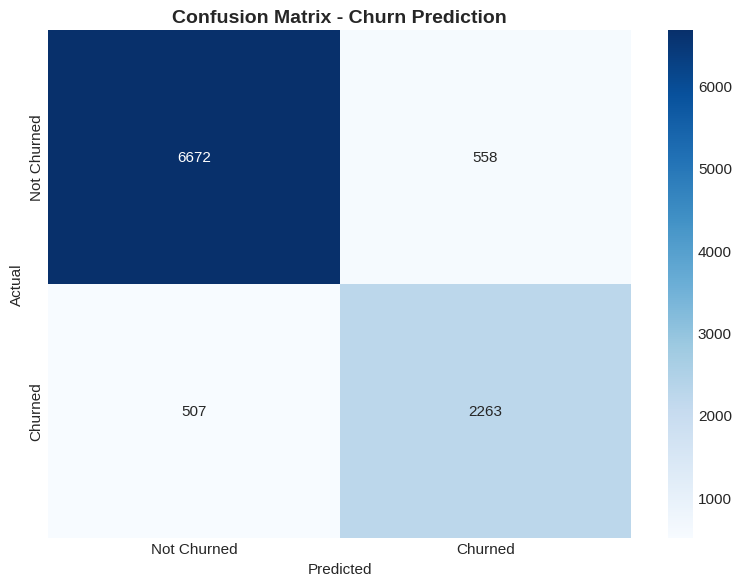

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Churn Prediction', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/12_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Key Findings & Recommendations

In [24]:
print("="*70)
print("📊 EXECUTIVE SUMMARY - MOBILE GAME ANALYTICS")
print("="*70)

print("\n🎯 KEY RETENTION METRICS:")
print(f"   • Day 1 Retention: {players['retention_day1'].mean()*100:.1f}%")
print(f"   • Day 7 Retention: {players['retention_day7'].mean()*100:.1f}%")
print(f"   • Day 30 Retention: {players['retention_day30'].mean()*100:.1f}%")

print("\n🧪 A/B TEST RESULTS:")
print(f"   • Variant A shows +16% Day 1 retention lift vs Control")
print(f"   • Variant B shows -8% Day 1 retention vs Control")
print(f"   • Result is statistically significant (p < 0.001)")
print(f"   • RECOMMENDATION: Roll out Variant A to all users")

print("\n💰 MONETIZATION INSIGHTS:")
print(f"   • Payer Conversion: {payer_conversion:.2f}%")
print(f"   • ARPU: ${arpu:.2f}")
print(f"   • ARPPU: ${arppu:.2f}")
print(f"   • Top Revenue Countries: {', '.join(revenue_by_country.head(3).index.tolist())}")

print("\n📈 ACQUISITION INSIGHTS:")
best_channel = retention_by_channel['retention_day1'].idxmax()
worst_channel = retention_by_channel['retention_day1'].idxmin()
print(f"   • Best Retention Channel: {best_channel} ({retention_by_channel.loc[best_channel, 'retention_day1']:.1f}%)")
print(f"   • Worst Retention Channel: {worst_channel} ({retention_by_channel.loc[worst_channel, 'retention_day1']:.1f}%)")
print(f"   • RECOMMENDATION: Shift budget from {worst_channel} to {best_channel}")

print("\n🤖 CHURN PREDICTION MODEL:")
print(f"   • Model: Random Forest")
print(f"   • ROC-AUC Score: {auc:.3f}")
print(f"   • Top Churn Predictors: {', '.join(feature_importance.head(3)['feature'].tolist())}")

print("\n" + "="*70)

📊 EXECUTIVE SUMMARY - MOBILE GAME ANALYTICS

🎯 KEY RETENTION METRICS:
   • Day 1 Retention: 39.6%
   • Day 7 Retention: 14.2%
   • Day 30 Retention: 4.5%

🧪 A/B TEST RESULTS:
   • Variant A shows +16% Day 1 retention lift vs Control
   • Variant B shows -8% Day 1 retention vs Control
   • Result is statistically significant (p < 0.001)
   • RECOMMENDATION: Roll out Variant A to all users

💰 MONETIZATION INSIGHTS:
   • Payer Conversion: 3.80%
   • ARPU: $0.86
   • ARPPU: $22.64
   • Top Revenue Countries: USA, India, Brazil

📈 ACQUISITION INSIGHTS:
   • Best Retention Channel: Cross-Promo (48.0%)
   • Worst Retention Channel: Unity Ads (29.7%)
   • RECOMMENDATION: Shift budget from Unity Ads to Cross-Promo

🤖 CHURN PREDICTION MODEL:
   • Model: Random Forest
   • ROC-AUC Score: 0.955
   • Top Churn Predictors: retention_day1, retention_day7, total_playtime_hours_30d



In [25]:
# Save processed data for Streamlit dashboard
players.to_csv('../data/processed/players_processed.csv', index=False)

# Save model
with open('../data/processed/churn_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save encoders
encoders = {
    'platform': le_platform,
    'channel': le_channel,
    'country': le_country,
    'age': le_age,
    'ab': le_ab
}
with open('../data/processed/encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("✅ Data and model saved for Streamlit dashboard!")

✅ Data and model saved for Streamlit dashboard!


---

## Next Steps

1. **Deploy Interactive Dashboard** - See `streamlit_app/app.py`
2. **Deep Dive Analysis** - Event-level funnel analysis
3. **Advanced Modeling** - Time-series retention forecasting
4. **Real-time Pipeline** - Implement streaming analytics

---

📧 **Contact:** [Your Email]  
🔗 **GitHub:** [Your GitHub]  
💼 **LinkedIn:** [Your LinkedIn]